>## EDA : ANALYTICAL QUESTIONS  -
>--- 
>### 1. What is the purchase margin among customers, i.e., the lowest, highest, and average monthly and annual sales amounts?  
>### 2. Which product is sold the most and the least monthly and annually?  
>### 3. Which mode of payment is most and least preferred by customers?  
>### 4. In which month and year does the cafe record peak sales?  
>### 5. How do total sales vary among different cafe locations or zones?  --- X
>### 6. What is the number of products sold vs their sales in cafes? 
>### 7. Which products do customers order more for Takeaway compared to In-Store orders?  
>### 8. What is the relative volume and sales value of Takeaway sales in comparison to In-Store sales?  
>### 9. Which day of the week or calendar date generates the most sales?  
>### Some Other interesting plots ie timeseries avg and heatmap

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
df = pd.read_csv('cleaned_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [282]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [283]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,9993.000000,9993.000000,9993.000000
mean,3.027019,2.952517,8.929200
std,1.384848,1.244351,5.996059
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [284]:
df.dtypes

Transaction ID       object
Item                 object
Quantity            float64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object

In [285]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    456
dtype: int64

> ### 1. What is the purchase margin among customers, i.e., the lowest, highest, and average monthly and annual sales amounts?  


In [286]:

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df["day"] = df['Transaction Date'].dt.day

monthly_margin = df[df['Transaction Date'].notna()].groupby(['Year','Month'])['Total Spent'].agg(['min','mean','max']).reset_index()
monthly_margin.rename(columns={'min': 'Min Monthly Spend', 'max': 'Max Monthly Spend', 'mean': 'Avg Monthly Spend'}, inplace=True)

print(monthly_margin)

      Year  Month  Min Monthly Spend  Avg Monthly Spend  Max Monthly Spend
0   2023.0    1.0                1.0           8.900978               25.0
1   2023.0    2.0                1.0           9.161623               25.0
2   2023.0    3.0                1.0           8.738210               25.0
3   2023.0    4.0                1.0           9.311370               25.0
4   2023.0    5.0                1.0           8.998067               25.0
5   2023.0    6.0                1.0           9.000000               25.0
6   2023.0    7.0                1.0           8.704172               25.0
7   2023.0    8.0                1.0           8.854919               25.0
8   2023.0    9.0                1.0           8.748731               25.0
9   2023.0   10.0                1.0           8.738663               25.0
10  2023.0   11.0                1.0           8.889031               25.0
11  2023.0   12.0                1.0           9.069357               25.0


In [287]:
annual_margin = df[df['Transaction Date'].notna()].groupby(['Year'])['Total Spent'].agg(['min', 'max', 'mean']).reset_index()
annual_margin.rename(columns={'min': 'Min Annual Spend', 'max': 'Max Annual Spend', 'mean': 'Avg Annual Spend'}, inplace=True)
print(annual_margin)

     Year  Min Annual Spend  Max Annual Spend  Avg Annual Spend
0  2023.0               1.0              25.0          8.922407


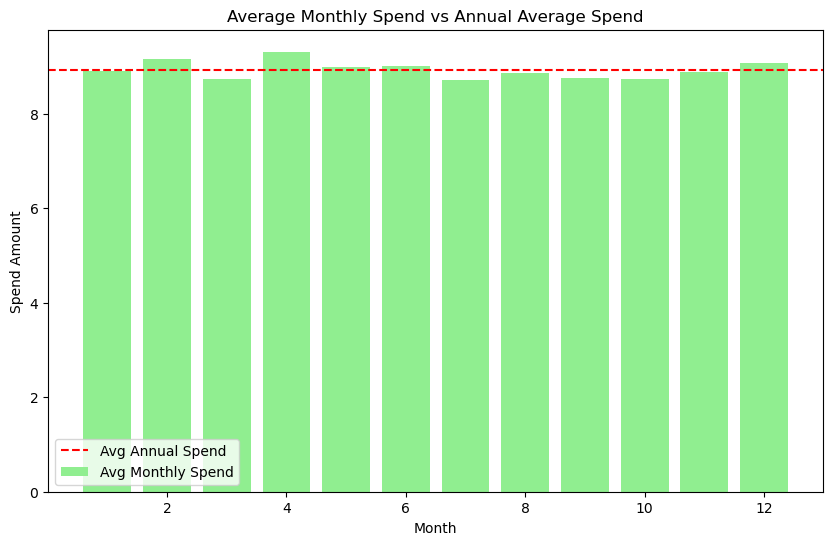

In [288]:
plt.figure(figsize=(10,6))
plt.bar(monthly_margin['Month'], monthly_margin['Avg Monthly Spend'], color='lightgreen', label='Avg Monthly Spend')

# Overlay average annual spend as a horizontal line
plt.axhline(y=annual_margin['Avg Annual Spend'].iloc[0], color='red', linestyle='--', label='Avg Annual Spend')

plt.xlabel('Month')
plt.ylabel('Spend Amount')
plt.title('Average Monthly Spend vs Annual Average Spend')
plt.legend()
plt.show()

>### 2. Which product is sold the most and the least monthly and annually?  


In [289]:
monthly_item_counts = df[df['Transaction Date'].notna()].groupby(['Year', 'Month', 'Item'])['Quantity'].sum().reset_index()
most_sold_monthly = monthly_item_counts.sort_values(['Year', 'Month', 'Quantity'], ascending=[True, True, False]).groupby(['Year', 'Month']).first().reset_index()
least_sold_monthly = monthly_item_counts.sort_values(['Year', 'Month', 'Quantity'], ascending=[True, True, True]).groupby(['Year', 'Month']).first().reset_index()

annual_item_counts = df[df['Transaction Date'].notna()].groupby(['Year', 'Item'])['Quantity'].sum().reset_index()
most_sold_annually = annual_item_counts.sort_values(['Year', 'Quantity'], ascending=[True, False]).groupby('Year').first().reset_index()
least_sold_annually = annual_item_counts.sort_values(['Year', 'Quantity'], ascending=[True, True]).groupby('Year').first().reset_index()

print("Monthly Analysis:\n")
print("Most Sold Items by Month:")
print(most_sold_monthly[['Month', 'Item', 'Quantity']].to_string(index=False))
print("\nLeast Sold Items by Month:")
print(least_sold_monthly[['Month', 'Item', 'Quantity']].to_string(index=False))


Monthly Analysis:

Most Sold Items by Month:
 Month     Item  Quantity
   1.0 Sandwich     348.0
   2.0   Coffee     286.0
   3.0   Coffee     322.0
   4.0    Juice     312.0
   5.0 Sandwich     296.0
   6.0    Salad     302.0
   7.0   Cookie     296.0
   8.0   Coffee     299.0
   9.0 Smoothie     295.0
  10.0   Coffee     339.0
  11.0     Cake     307.0
  12.0   Coffee     316.0

Least Sold Items by Month:
 Month         Item  Quantity
   1.0     Smoothie     191.0
   2.0       Cookie     220.0
   3.0 Unknown Item     239.0
   4.0       Cookie     218.0
   5.0          Tea     229.0
   6.0 Unknown Item     243.0
   7.0        Juice     211.0
   8.0        Juice     230.0
   9.0       Coffee     231.0
  10.0 Unknown Item     215.0
  11.0 Unknown Item     185.0
  12.0 Unknown Item     235.0


In [290]:
print("\nAnnual Analysis:\n")
print("Most Sold Item in 2023:")
print(most_sold_annually[['Item', 'Quantity']].to_string(index=False))
print("\nLeast Sold Item in 2023:")
print(least_sold_annually[['Item', 'Quantity']].to_string(index=False))


Annual Analysis:

Most Sold Item in 2023:
  Item  Quantity
Coffee    3425.0

Least Sold Item in 2023:
        Item  Quantity
Unknown Item    2781.0


C:\Users\Om\AppData\Local\Temp\ipykernel_6308\1710524867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sorted_data, x='Item', y='Quantity',


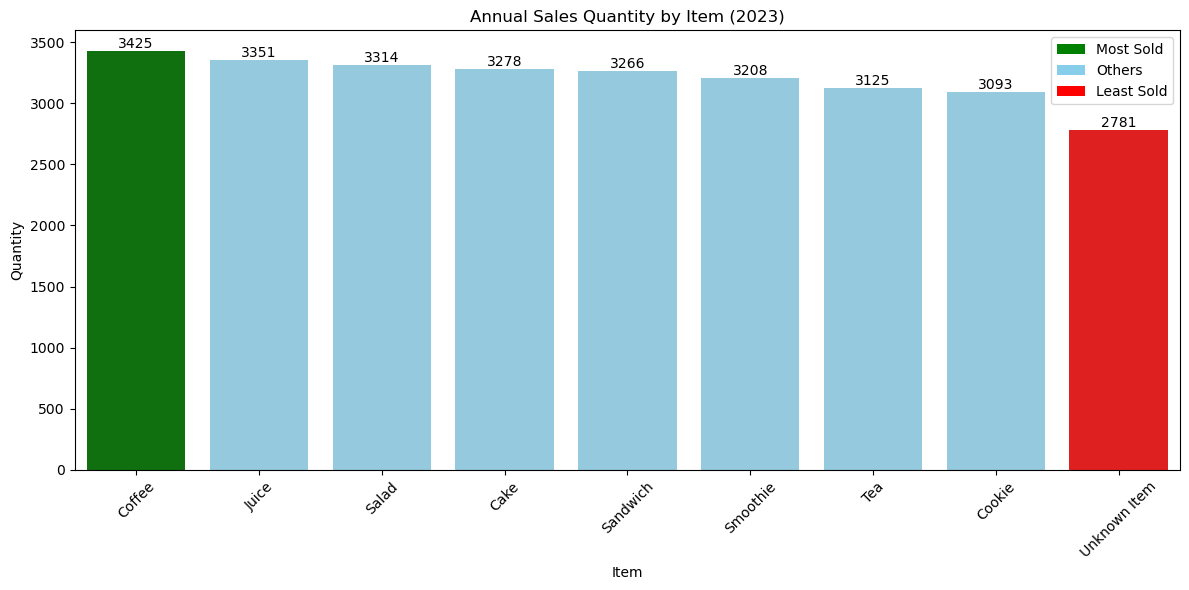

In [291]:
sorted_data = annual_item_counts.sort_values('Quantity', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))

ax = sns.barplot(data=sorted_data, x='Item', y='Quantity', 
                palette=['green' if i == 0 else 'red' if i == len(sorted_data)-1 else 'skyblue' 
                        for i in range(len(sorted_data))])

# Add value labels on top of each bar
for i, v in enumerate(sorted_data['Quantity']):
    ax.text(i, v, f'{int(v)}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title('Annual Sales Quantity by Item (2023)')

legend_elements = [plt.Rectangle((0,0),1,1, facecolor='green', label='Most Sold'),
                  plt.Rectangle((0,0),1,1, facecolor='skyblue', label='Others'),
                  plt.Rectangle((0,0),1,1, facecolor='red', label='Least Sold')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()



>### 3. Which mode of payment is most and least preferred by customers?  

In [292]:
# Count the frequency of each payment method
payment_counts = df['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']

print("Most preferred payment method:", payment_counts.iloc[0]['Payment Method'], 
    f"({payment_counts.iloc[0]['Count']} transactions)")
print("Least preferred payment method:", payment_counts.iloc[-1]['Payment Method'], 
    f"({payment_counts.iloc[-1]['Count']} transactions)")

Most preferred payment method: Unknown (3171 transactions)
Least preferred payment method: Cash (2258 transactions)


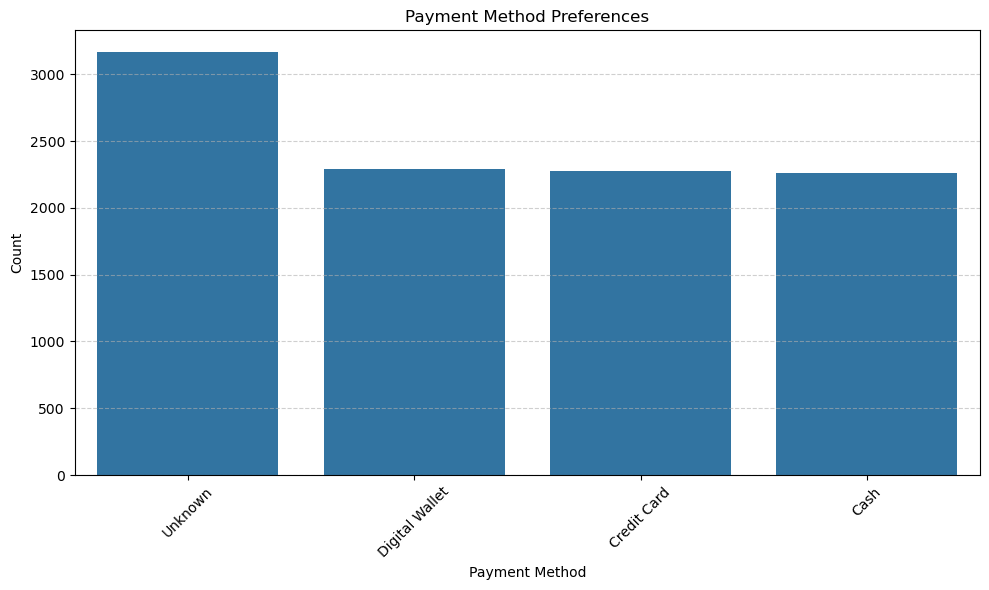

In [293]:
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_counts, x='Payment Method', y='Count')
ax.margins(y=0.1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Payment Method Preferences')
plt.tight_layout()
plt.show()

>### 4. In which month and year does the cafe record peak sales?  


In [294]:
import calendar

monthly_peak_sales = df.groupby(['Year','Month'])['Total Spent'].sum().reset_index()
peak = monthly_peak_sales.loc[monthly_peak_sales['Total Spent'].idxmax()]

print(f"Peak monthly sales for year is : {calendar.month_name[int(peak['Month'])]}, {int(peak['Year'])}  with total ₹{peak['Total Spent']:.2f}")

Peak monthly sales for year is : June, 2023  with total ₹7362.00


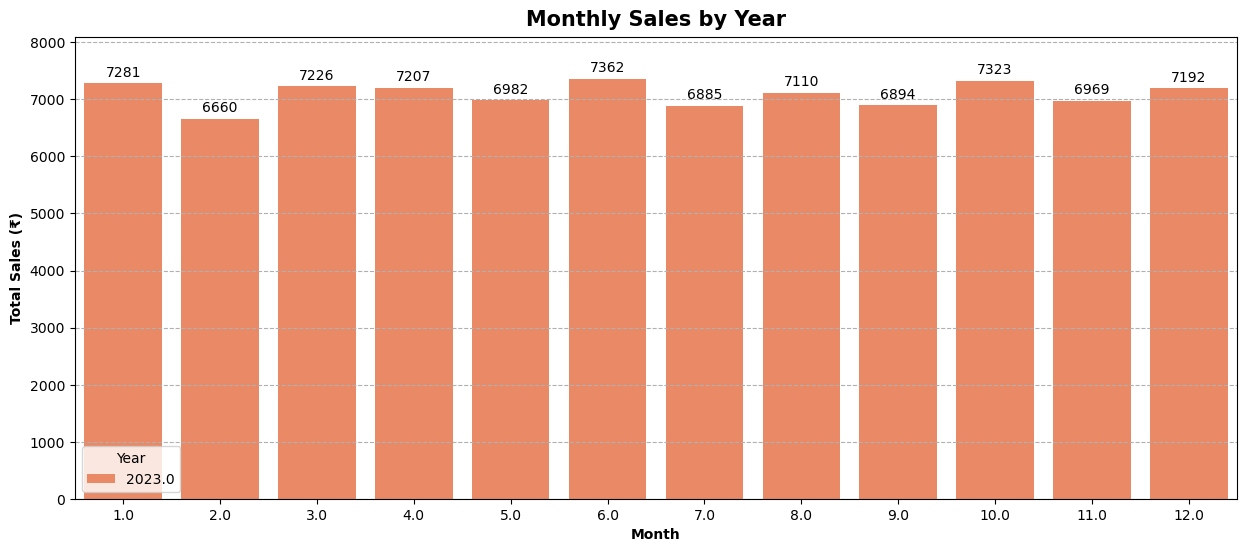

In [295]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=monthly_peak_sales, x='Month', y='Total Spent', hue='Year', palette=['coral'])
ax.margins(y=0.1)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title("Monthly Sales by Year", pad=8, fontsize=15, fontweight='bold')
plt.ylabel("Total Sales (₹)", fontsize=10, fontweight='bold')
plt.xlabel("Month", fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

>### 5. How do total sales vary among takeaway and in-store?

C:\Users\Om\AppData\Local\Temp\ipykernel_6308\2197584088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=loca, x='Location', y='Total Spent', palette='viridis')


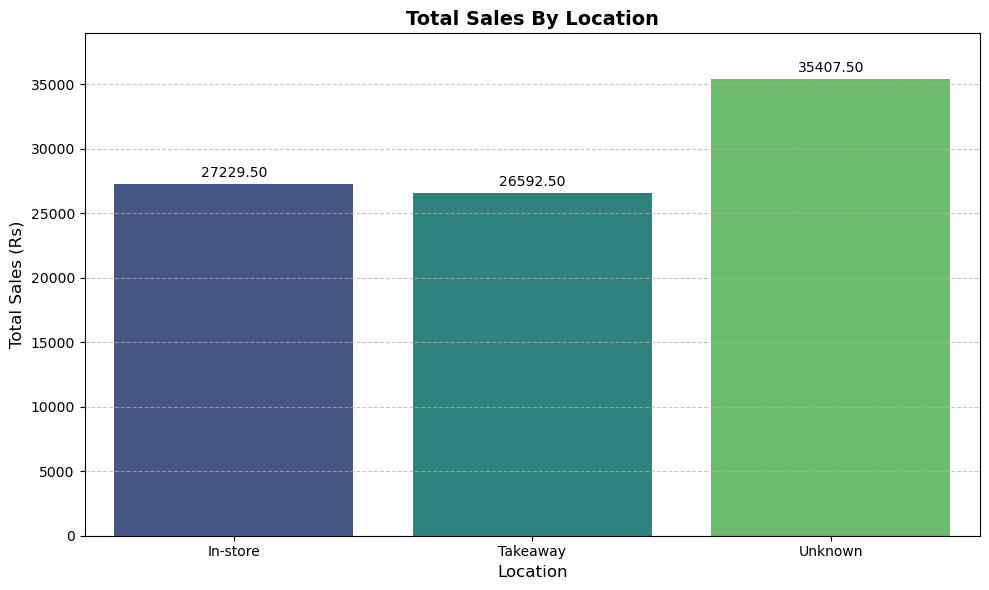

In [296]:
loca = df.groupby('Location')['Total Spent'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=loca, x='Location', y='Total Spent', palette='viridis')

plt.title('Total Sales By Location', fontsize=14, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Sales (Rs)', fontsize=12)
plt.xticks(fontsize=10)
ax.margins(y=0.1)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

>### 6. What is the number of products sold vs their sales in cafes? 

C:\Users\Om\AppData\Local\Temp\ipykernel_6308\3255446650.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Item', y='Total Spent', data=product_vs_sales, palette='pastel')


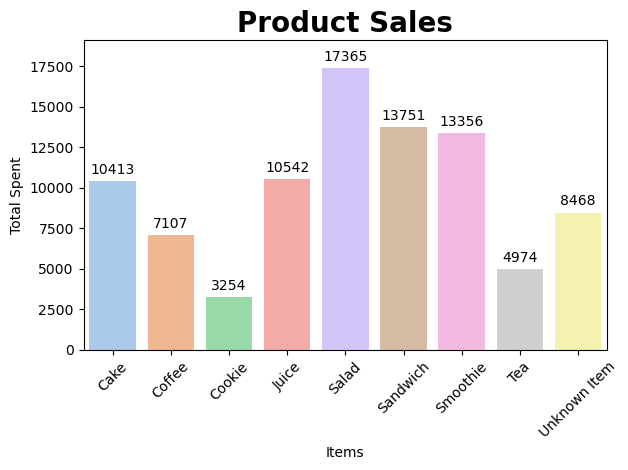

In [297]:
product_vs_sales = df.groupby('Item')['Total Spent'].sum().reset_index()
product_vs_sales

ax = sns.barplot(x='Item', y='Total Spent', data=product_vs_sales, palette='pastel')
plt.xlabel("Items")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)
ax.margins(y=0.1)

plt.title("Product Sales", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


>### 7. Which products do customers order more for Takeaway compared to In-Store orders? 

In [298]:
order_counts = df.groupby(['Item', 'Location']).size().reset_index(name='Order Count')
order_counts

,Item,Location,Order Count
0,Cake,In-store,321
1,Cake,Takeaway,343
2,Cake,Unknown,475
3,Coffee,In-store,318
4,Coffee,Takeaway,351
5,Coffee,Unknown,496
6,Cookie,In-store,332
7,Cookie,Takeaway,362
8,Cookie,Unknown,397
9,Juice,In-store,361


In [299]:
#pivoting the table for easier understanding
pivot_table = order_counts.pivot(index='Item', columns='Location', values='Order Count')
pivot_table = pivot_table.reset_index()
pivot_table.columns.name = None
pivot_table = pivot_table.drop(columns='Unknown')
pivot_table

,Item,In-store,Takeaway
0,Cake,321,343
1,Coffee,318,351
2,Cookie,332,362
3,Juice,361,341
4,Salad,371,343
5,Sandwich,370,345
6,Smoothie,322,304
7,Tea,328,336
8,Unknown Item,292,296


In [300]:
more_takeaway = pivot_table[pivot_table['Takeaway'] > pivot_table['In-store']]
more_takeaway

,Item,In-store,Takeaway
0,Cake,321,343
1,Coffee,318,351
2,Cookie,332,362
7,Tea,328,336
8,Unknown Item,292,296


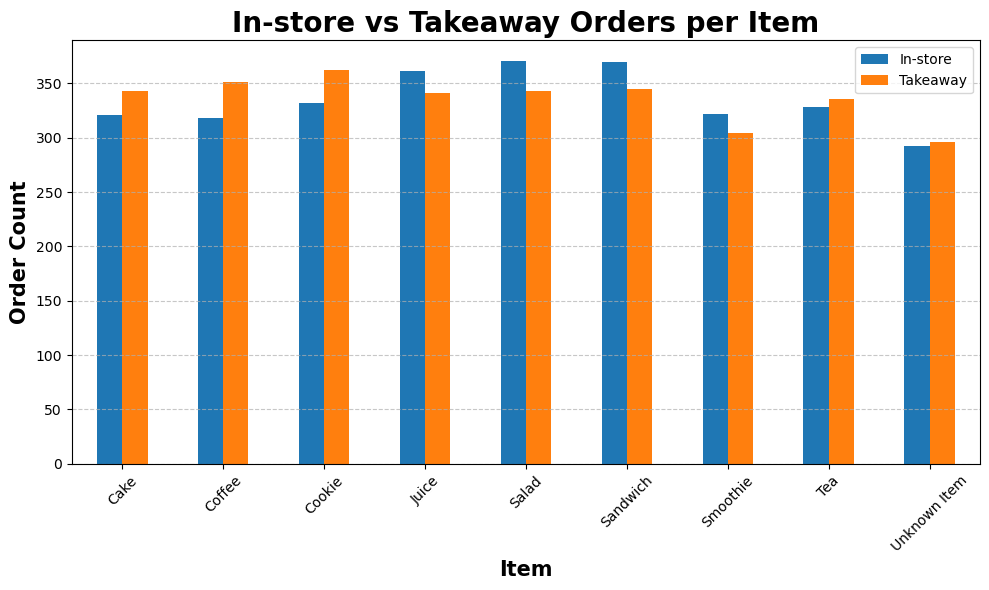

In [301]:
import matplotlib.pyplot as plt

pivot_table.set_index('Item')[['In-store', 'Takeaway']].plot(kind='bar', figsize=(10, 6))

plt.title('In-store vs Takeaway Orders per Item', fontsize=20, fontweight="bold")
plt.ylabel('Order Count',fontsize=15, fontweight="bold")
plt.xlabel('Item',fontsize=15, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


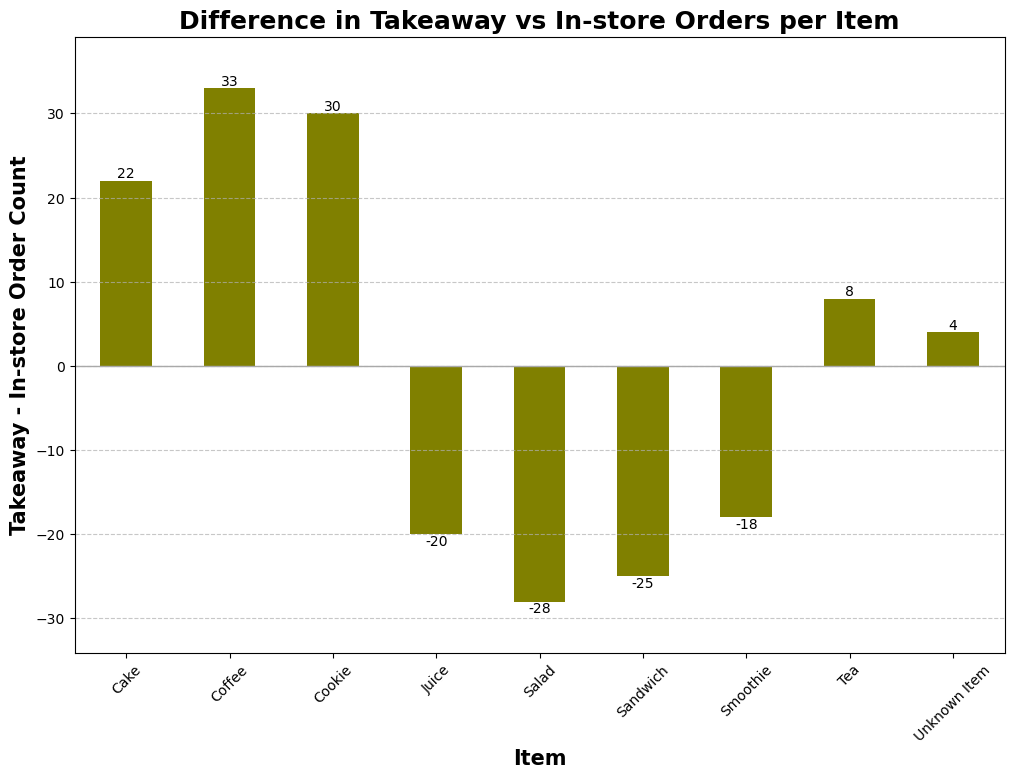

In [302]:
import matplotlib.pyplot as plt

# Calculating the difference
pivot_table['Difference'] = pivot_table['Takeaway'] - pivot_table['In-store']

plt.figure(figsize=(12, 8))

# Plotting the difference bar chart
bars = pivot_table.set_index('Item')['Difference'].plot(kind='bar', color='olive')

# Add value labels
for i, val in enumerate(pivot_table['Difference']):
    plt.text(i, val, f'{val}', ha='center', va='bottom' if val >= 0 else 'top')

plt.margins(y=0.1)
plt.axhline(0, color='darkgray', linewidth=1)
plt.title('Difference in Takeaway vs In-store Orders per Item', fontsize=18, fontweight="bold")
plt.ylabel('Takeaway - In-store Order Count',fontsize=15, fontweight="bold")
plt.xlabel('Item',fontsize=15, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


>### 8. What is the relative volume and sales value of Takeaway sales in comparison to In-Store sales?

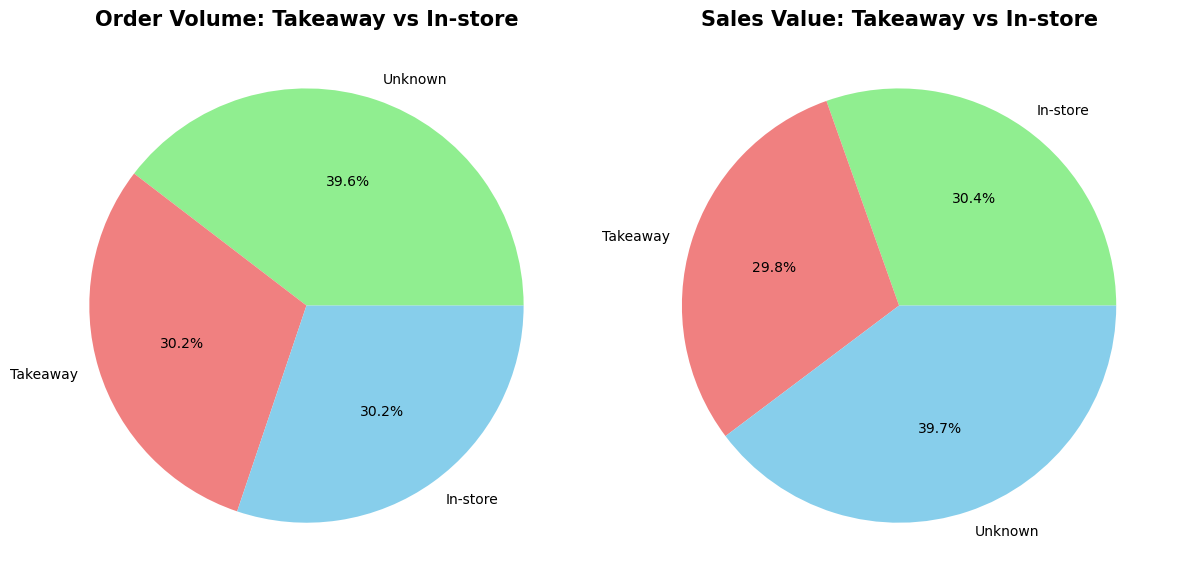

In [303]:
import matplotlib.pyplot as plt

# Volume: Count of orders by Location
volume_counts = df['Location'].value_counts()

# Sales Value: Total revenue per Location
df['Sales'] = df['Quantity'] * df['Price Per Unit']
sales_by_location = df.groupby('Location')['Sales'].sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = ['lightgreen', 'lightcoral', 'skyblue']

# Volume Pie Chart
axes[0].pie(volume_counts, labels=volume_counts.index, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Order Volume: Takeaway vs In-store', fontsize=15, fontweight="bold")

# Sales Value Pie Chart
axes[1].pie(sales_by_location, labels=sales_by_location.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Sales Value: Takeaway vs In-store', fontsize=15, fontweight="bold")

plt.tight_layout()
plt.show()


>### 9. Which day of the week or calendar date generates the most sales?  

C:\Users\Om\AppData\Local\Temp\ipykernel_6308\2433986953.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='magma')


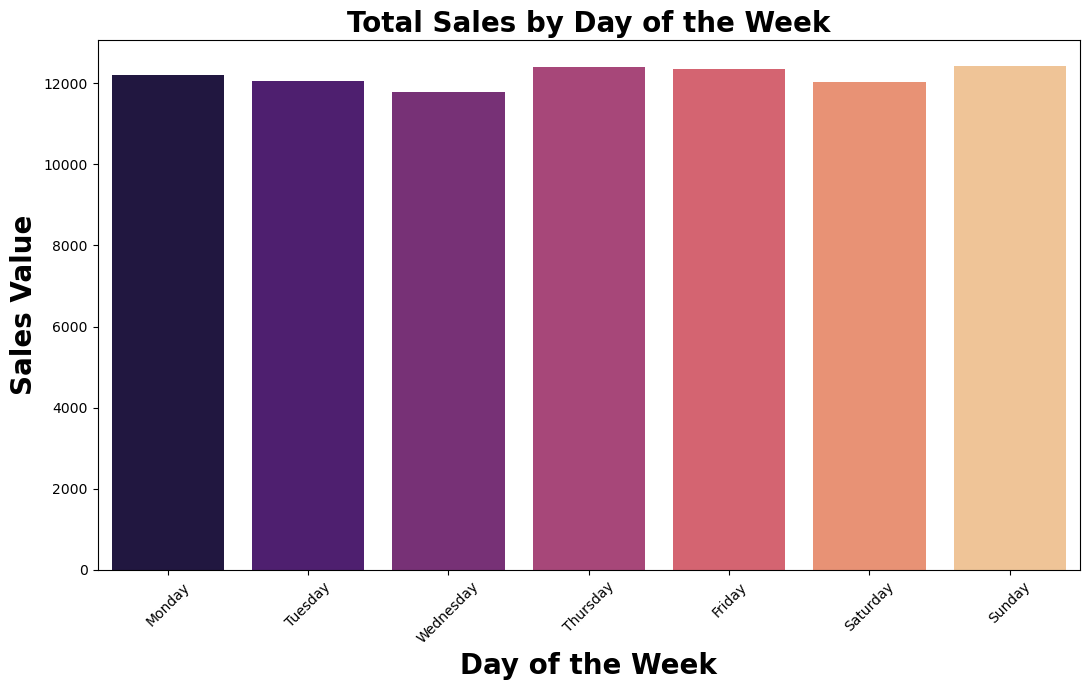

In [304]:
# Extract day of week
df['DayOfWeek'] = df['Transaction Date'].dt.day_name()

sales_by_day = df.groupby('DayOfWeek')['Sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(11,7))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='magma')
plt.title("Total Sales by Day of the Week",fontsize=20, fontweight='bold')
plt.ylabel("Sales Value",fontsize=20, fontweight='bold')
plt.xlabel("Day of the Week",fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Om\AppData\Local\Temp\ipykernel_6308\4045383485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dates.index.strftime('%Y-%m-%d'), y=top_dates.values, palette='magma')


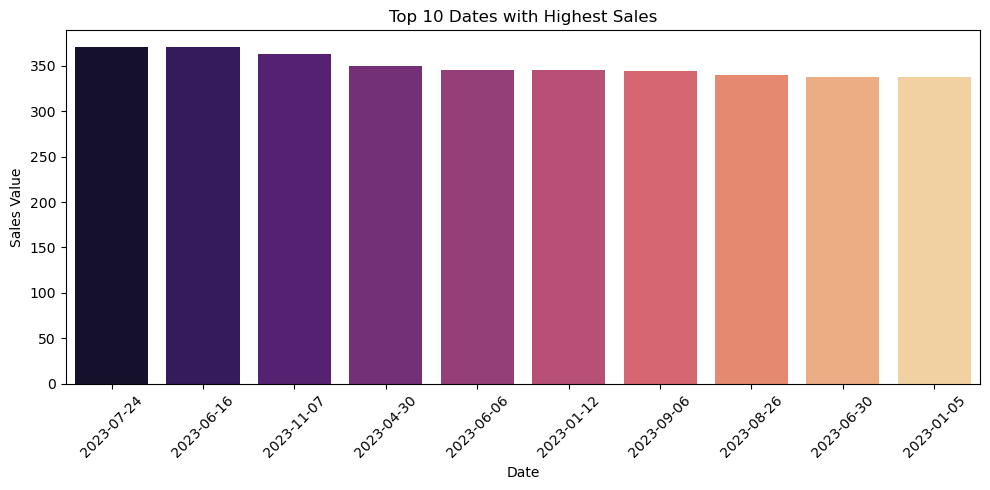

In [307]:
sales_by_date = df.groupby('Transaction Date')['Sales'].sum()

# Plotting top 10 dates
top_dates = sales_by_date.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_dates.index.strftime('%Y-%m-%d'), y=top_dates.values, palette='magma')
plt.title("Top 10 Dates with Highest Sales")
plt.ylabel("Sales Value")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


>### Line plot with rolling average (of window : 7)

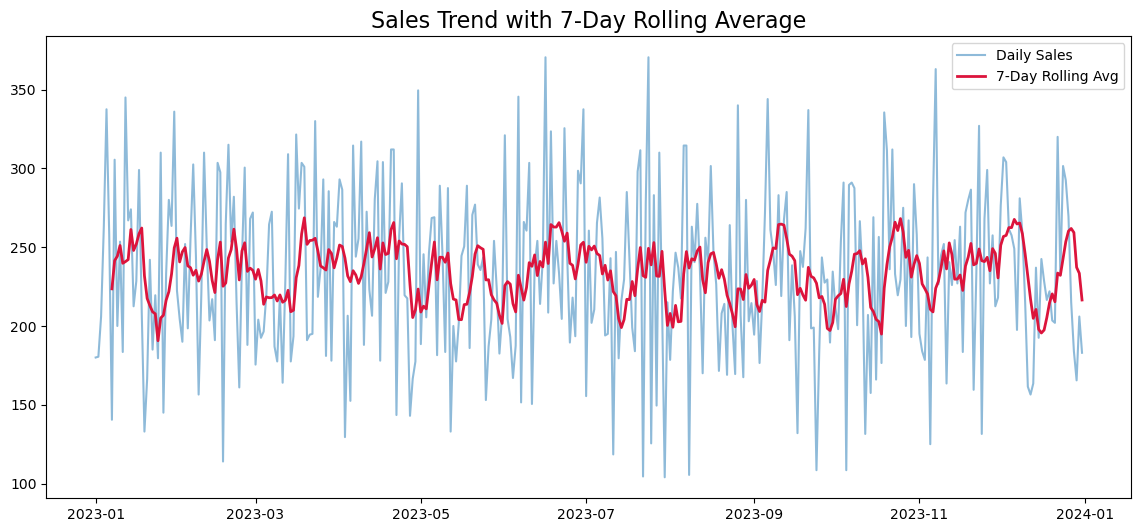

In [ ]:
daily_sales = df.groupby('Date')['Sales'].sum()
rolling_sales = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(daily_sales, label='Daily Sales', alpha=0.5)
plt.plot(rolling_sales, label='7-Day Rolling Avg', color='crimson', linewidth=2)
plt.title("Sales Trend with 7-Day Rolling Average", fontsize=16)
plt.legend()
plt.show()


>## Heatmap of - sales corresponding to each day 

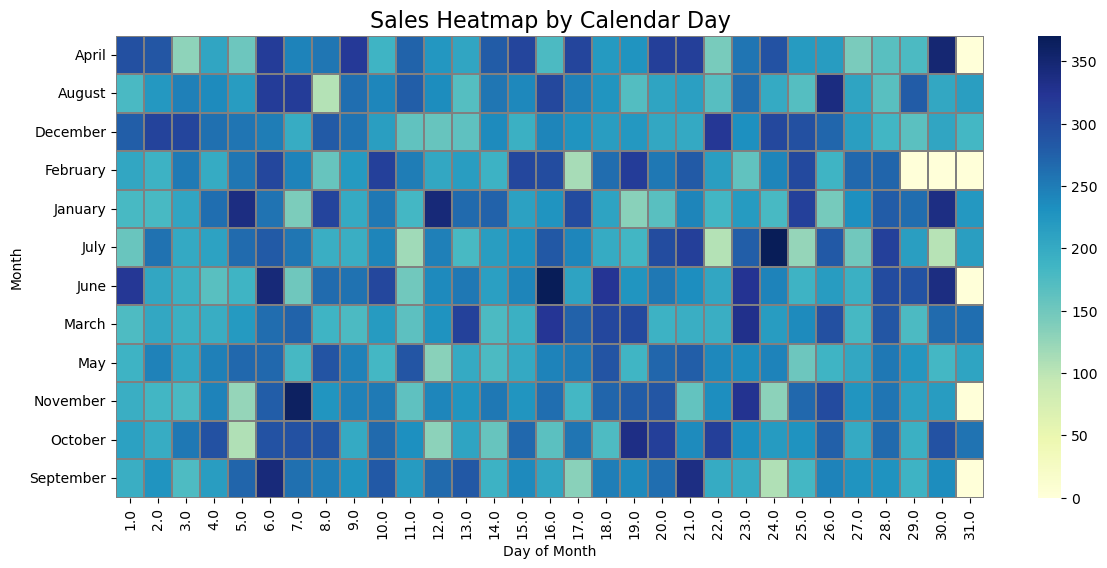

In [ ]:
# Extract day and month
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()

# Pivot for heatmap
calendar_pivot = df.groupby(['Month', 'Day'])['Sales'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(calendar_pivot, cmap='YlGnBu', linewidths=0.1, linecolor='gray')
plt.title("Sales Heatmap by Calendar Day", fontsize=16)
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()
